#Data Visualiation, Imputation & Feature Selection Assignment
Jaideep Siva Senthil, IE 7860

###Installing packages



In [ ]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='dark', font_scale=1.4)
import plotly.express as px

# Sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

!pip install umap
!pip install umap-learn[plot]
!pip install umap-learn[parametric_umap]

###Importing data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
data = pd.read_csv('diabetes.csv')

###Visualizing data

Checking for missing data

In [ ]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

> No missing data values

Checking data spread

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Data distribution

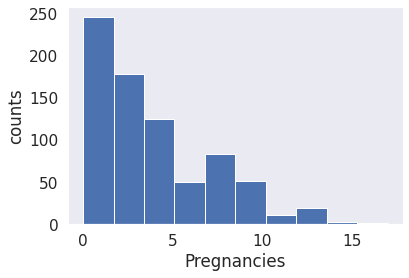

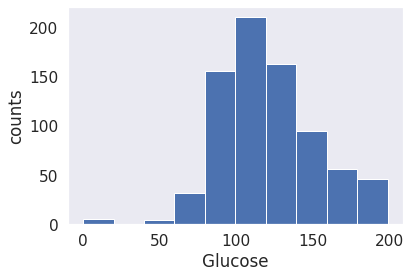

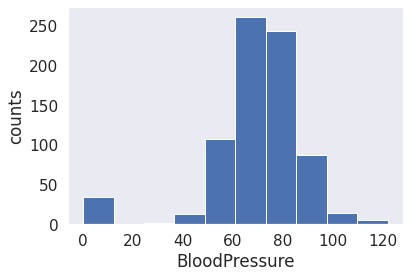

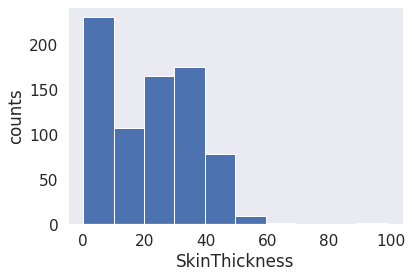

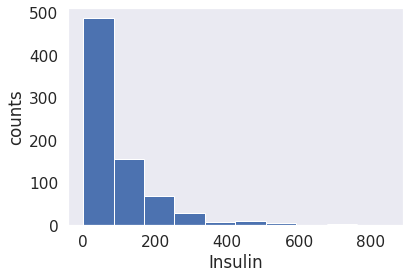

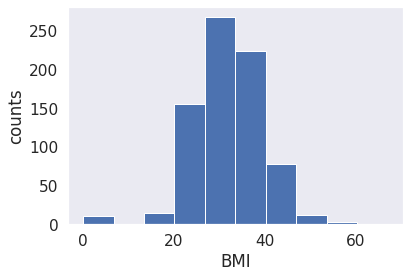

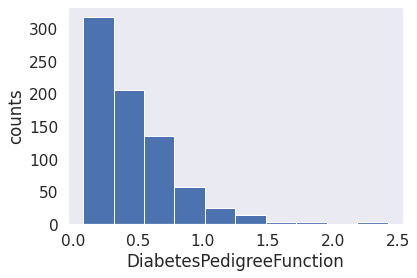

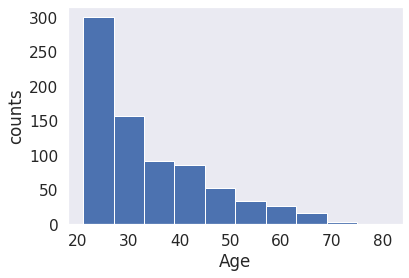

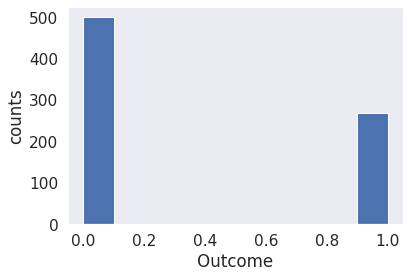

In [ ]:
for i in data.columns:
    plt.hist(data[i])
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('counts')
    plt.show()

Analysis:
> * Glucose and blood pressure appears to have an outlier at value of ~0 , it is important to see if it has any importance in prediction
>* Diabetes has a large right skewed tail
>* There seems to be a class imbalance between the outcomes with almost twice 0's when compared to 1's



Outlier visualization

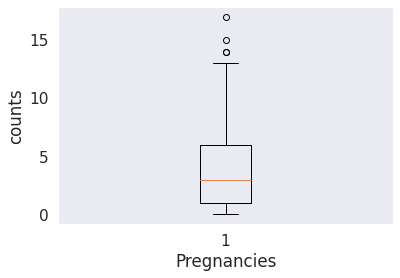

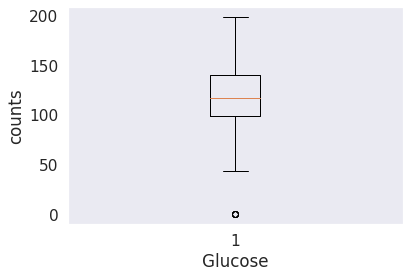

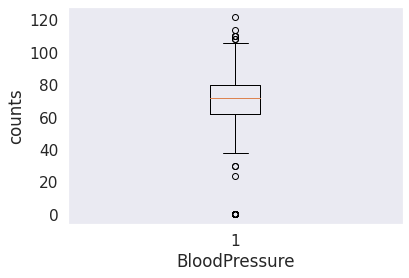

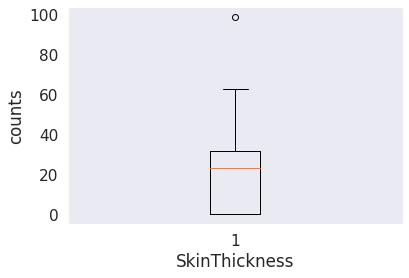

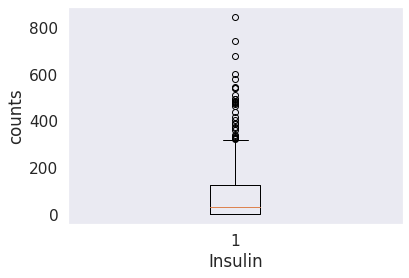

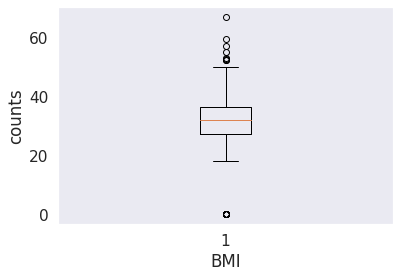

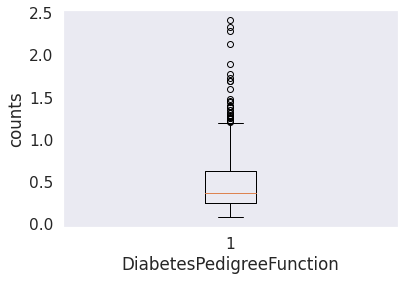

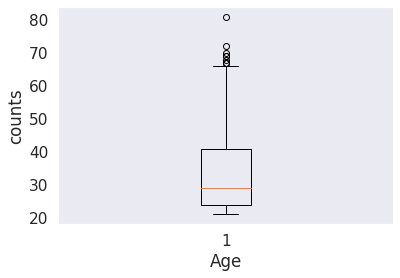

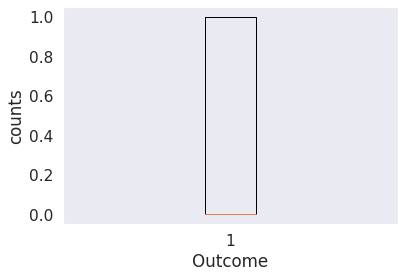

In [ ]:
for i in data.columns:
    figsize = (15,15)
    plt.boxplot(data[i])
    plt.xticks()

    plt.xlabel(i)
    plt.ylabel('counts')
    plt.show()

>Most of the features have outliers , it is important to see if they have any impact on the label before removing them

Plotting outliers

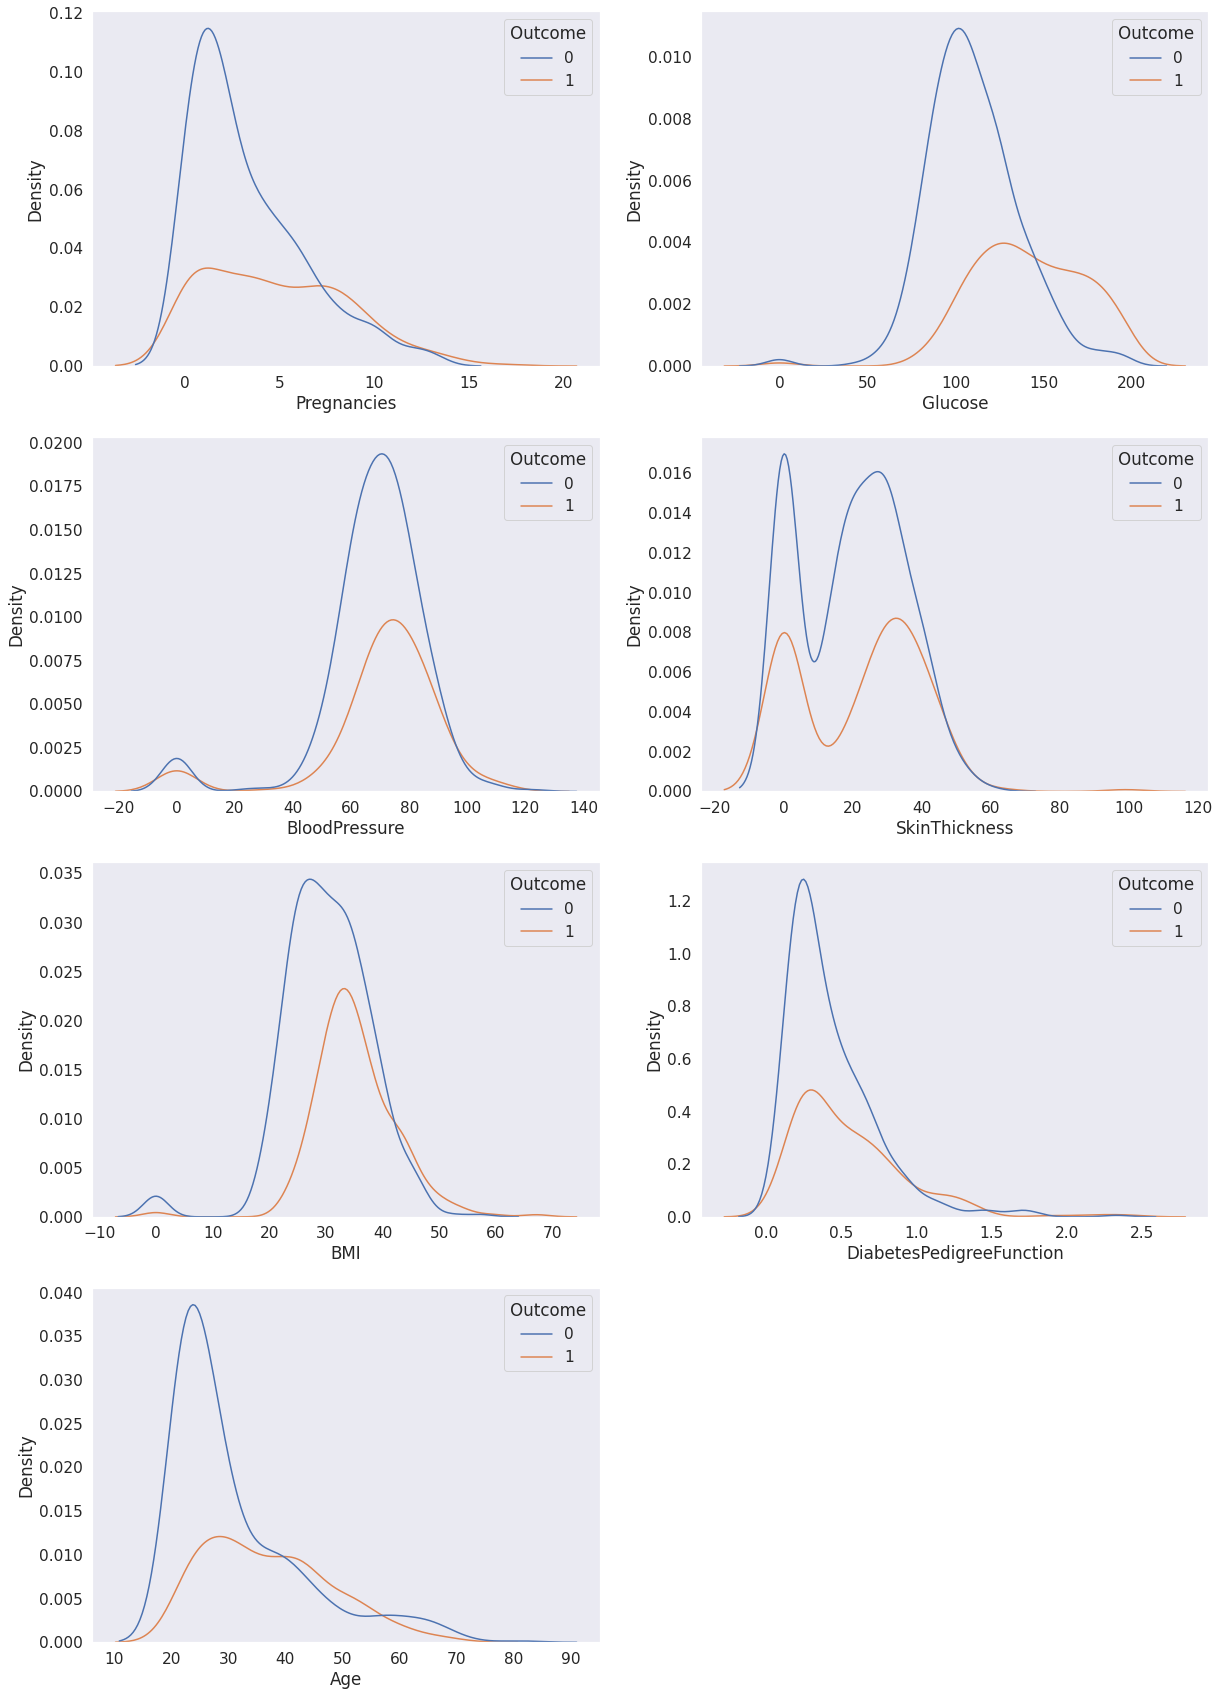

In [ ]:
fig,axes = plt.subplots(4, 2,figsize=(20, 30))

sns.kdeplot(data=data, x='Pregnancies',hue="Outcome",ax = axes[0,0])

sns.kdeplot(data=data, x='Glucose',hue="Outcome",ax = axes[0,1])

sns.kdeplot(data=data, x='BloodPressure',hue="Outcome",ax = axes[1,0])

sns.kdeplot(data=data, x='SkinThickness',hue="Outcome",ax = axes[1,1])

sns.kdeplot(data=data, x='BMI',hue="Outcome",ax = axes[2,0])

sns.kdeplot(data=data, x='DiabetesPedigreeFunction',hue="Outcome",ax = axes[2,1])

sns.kdeplot(data=data, x='Age',hue="Outcome",ax = axes[3,0])


fig.delaxes(axes[3][1])

Analysis
> * Most of the data don't happen to show any direct contribution to output
>*The glucose, blooddpressure, skin thicnkess, BMI outliers don't seem to have a major impact on the output. It would be safe to remove them.


Outlier removal

In [ ]:
features = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'BMI','DiabetesPedigreeFunction' ]
label = ["Outcome"]

continuous_data=data[features]
for k, v in continuous_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("no of outliers in {} = {}".format(k,len(v_col)))

no of outliers in Pregnancies = 4
no of outliers in Glucose = 5
no of outliers in BloodPressure = 45
no of outliers in SkinThickness = 1
no of outliers in BMI = 19
no of outliers in DiabetesPedigreeFunction = 29


Scaling data

In [ ]:
features = data.drop(['Outcome'],axis=1)
labels = data[['Outcome']]
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')
X_scaled = scaler.fit_transform(features)
X_scaled

array([[ 0.66656426,  0.87356913,  0.03798835, ...,  0.23938016,
         0.67885839,  1.22064035],
       [-0.73121725, -1.27581704, -0.41687796, ..., -0.75345182,
        -0.05958613,  0.1397103 ],
       [ 1.09680356,  1.70850819, -0.5894558 , ..., -1.33005035,
         0.7880981 ,  0.20396118],
       ...,
       [ 0.45867907,  0.12410193,  0.03798835, ..., -0.79908276,
        -0.66357894,  0.07603162],
       [-0.73121725,  0.29541514, -0.90845787, ..., -0.24290266,
        -0.06447445,  1.12020535],
       [-0.73121725, -0.9204776 , -0.11418529, ..., -0.21690443,
        -0.20271045, -0.83442701]])

##Normal Model

Splitting features


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size = 0.2, random_state = 0)
model = Sequential()
model.add(Dense(features.shape[1], activation = 'relu', input_dim = features.shape[1]))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size = 1024, epochs = 15, validation_data=(X_test, y_test), verbose = 1)




Epoch 1/15
1/1 [==============================] - 4s 4s/step - loss: 0.6953 - accuracy: 0.5879 - val_loss: 0.7055 - val_accuracy: 0.5714
Epoch 2/15
1/1 [==============================] - 0s 38ms/step - loss: 0.6922 - accuracy: 0.5945 - val_loss: 0.7004 - val_accuracy: 0.5974
Epoch 3/15
1/1 [==============================] - 0s 40ms/step - loss: 0.6891 - accuracy: 0.6059 - val_loss: 0.6954 - val_accuracy: 0.6104
Epoch 4/15
1/1 [==============================] - 0s 45ms/step - loss: 0.6861 - accuracy: 0.6140 - val_loss: 0.6905 - val_accuracy: 0.6169
Epoch 5/15
1/1 [==============================] - 0s 39ms/step - loss: 0.6831 - accuracy: 0.6124 - val_loss: 0.6857 - val_accuracy: 0.6429
Epoch 6/15
1/1 [==============================] - 0s 67ms/step - loss: 0.6802 - accuracy: 0.6221 - val_loss: 0.6811 - val_accuracy: 0.6494
Epoch 7/15
1/1 [==============================] - 0s 59ms/step - loss: 0.6773 - accuracy: 0.6336 - val_loss: 0.6765 - val_accuracy: 0.6688
Epoch 8/15
1/1 [=============

##Feature Selection



Installing packages

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


Splitting train and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 0)

Selecting Features

Feature 0: 70.604496
Feature 1: 1082.232331
Feature 2: 11.254005
Feature 3: 59.647095
Feature 4: 1480.723984
Feature 5: 110.066860
Feature 6: 3.892318
Feature 7: 150.477034


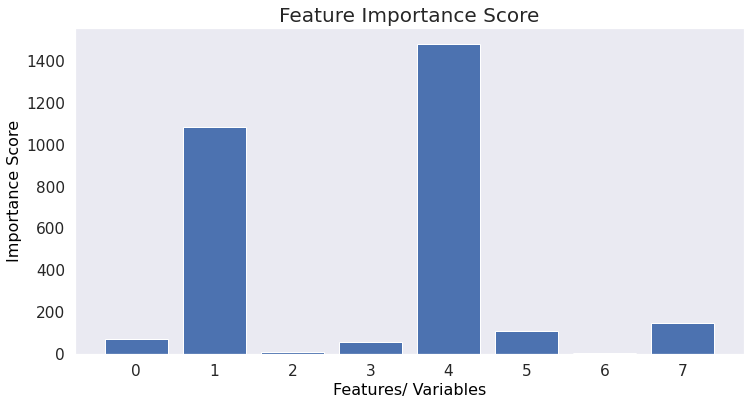

In [ ]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.figure(figsize = (12,6))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title("Feature Importance Score", size = 20)
plt.xlabel("Features/ Variables", size = 16, color = "black")
plt.ylabel("Importance Score", size = 16, color = "black")
plt.show()

In [ ]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

> Selecting features that have a score more than 200
which are Glucose, and Insulin

Splitting desired features

In [ ]:
X_new = features[['Glucose','Insulin']]
scaler = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')
X_new_scaled = scaler.fit_transform(X_new)
X_new_scaled



array([[ 0.87356913, -5.19933758],
       [-1.27581704, -5.19933758],
       [ 1.70850819, -5.19933758],
       ...,
       [ 0.12410193,  0.55663362],
       [ 0.29541514, -5.19933758],
       [-0.9204776 , -5.19933758]])

Feature Selcted Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new_scaled, labels, test_size = 0.2, random_state = 0)

model = Sequential()
model.add(Dense(X_new_scaled.shape[1], activation = 'relu', input_dim = X_new_scaled.shape[1]))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size = 1024, epochs = 15, validation_data=(X_test, y_test), verbose = 1)



Epoch 1/15
1/1 [==============================] - 1s 1s/step - loss: 0.7536 - accuracy: 0.4104 - val_loss: 0.7663 - val_accuracy: 0.4286
Epoch 2/15
1/1 [==============================] - 0s 41ms/step - loss: 0.7457 - accuracy: 0.4153 - val_loss: 0.7562 - val_accuracy: 0.4351
Epoch 3/15
1/1 [==============================] - 0s 37ms/step - loss: 0.7382 - accuracy: 0.4202 - val_loss: 0.7466 - val_accuracy: 0.4416
Epoch 4/15
1/1 [==============================] - 0s 63ms/step - loss: 0.7311 - accuracy: 0.4251 - val_loss: 0.7374 - val_accuracy: 0.4416
Epoch 5/15
1/1 [==============================] - 0s 40ms/step - loss: 0.7243 - accuracy: 0.4300 - val_loss: 0.7286 - val_accuracy: 0.4675
Epoch 6/15
1/1 [==============================] - 0s 41ms/step - loss: 0.7180 - accuracy: 0.4463 - val_loss: 0.7203 - val_accuracy: 0.4740
Epoch 7/15
1/1 [==============================] - 0s 45ms/step - loss: 0.7120 - accuracy: 0.4674 - val_loss: 0.7125 - val_accuracy: 0.5000
Epoch 8/15
1/1 [=============

>* It appears that glucose and insuling provides a smilar model when in comparision to the regular model that was built

##PCA

Getting PCA

In [ ]:
X_scaled

array([[ 0.66656426,  0.87356913,  0.03798835, ...,  0.23938016,
         0.67885839,  1.22064035],
       [-0.73121725, -1.27581704, -0.41687796, ..., -0.75345182,
        -0.05958613,  0.1397103 ],
       [ 1.09680356,  1.70850819, -0.5894558 , ..., -1.33005035,
         0.7880981 ,  0.20396118],
       ...,
       [ 0.45867907,  0.12410193,  0.03798835, ..., -0.79908276,
        -0.66357894,  0.07603162],
       [-0.73121725,  0.29541514, -0.90845787, ..., -0.24290266,
        -0.06447445,  1.12020535],
       [-0.73121725, -0.9204776 , -0.11418529, ..., -0.21690443,
        -0.20271045, -0.83442701]])

In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

In [ ]:
pca_Df = pd.DataFrame(data = pca_data
             , columns = ['principal component 1', 'principal component 2'])
pca_Df['y'] = labels
pca_Df.head()

,principal component 1,principal component 2,y
0,-1.136960,-1.745887,1
1,-1.462701,0.305685,0
2,-5.056010,-1.228516,1
3,2.911914,2.637473,0
4,4.146909,3.416996,1


Graphing PCA

<Axes: xlabel='principal component 1', ylabel='principal component 2'>

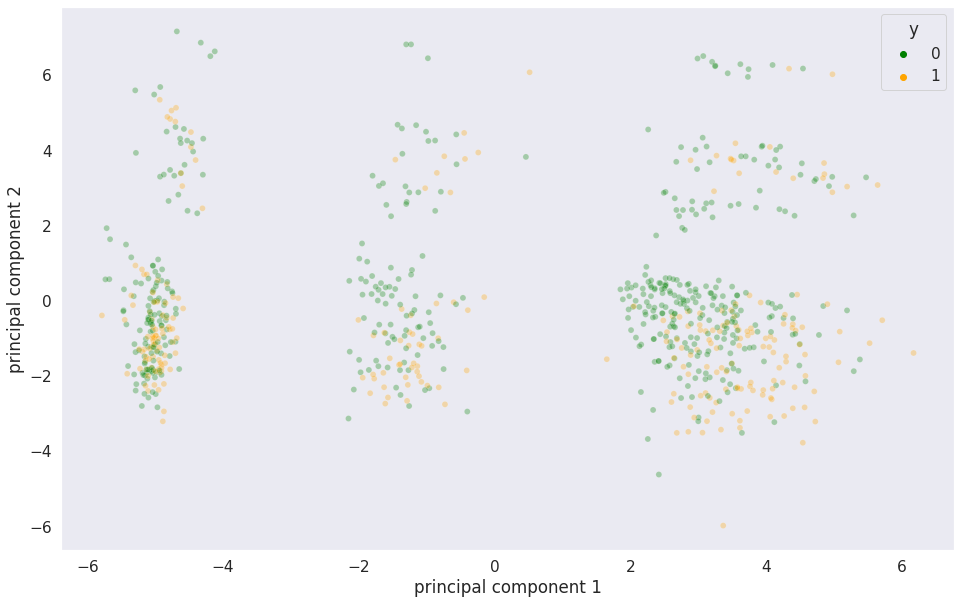

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=['green','orange'],
    data=pca_Df,
    legend="full",
    alpha=0.3
)

In [ ]:
pca = PCA(0.9)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size = 0.2, random_state = 0)
pca.fit(X_test)
PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
pca.n_components_


2

In [ ]:
y_test

,Outcome
661,1
122,0
113,0
14,1
529,0
...,...
476,1
482,0
230,1
527,0


Training PCA

In [ ]:
train_pca = pca.transform(X_train)
test_pca = pca.transform(X_test)

model = Sequential()
model.add(Dense(train_pca.shape[1], activation = 'relu', input_dim = train_pca.shape[1]))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(test_pca, y_test, batch_size = 1024, epochs = 15, validation_data=(test_pca, y_test), verbose = 1)

Epoch 1/15
1/1 [==============================] - 1s 1s/step - loss: 0.6979 - accuracy: 0.5519 - val_loss: 0.6965 - val_accuracy: 0.5649
Epoch 2/15
1/1 [==============================] - 0s 40ms/step - loss: 0.6965 - accuracy: 0.5649 - val_loss: 0.6953 - val_accuracy: 0.5779
Epoch 3/15
1/1 [==============================] - 0s 42ms/step - loss: 0.6953 - accuracy: 0.5779 - val_loss: 0.6941 - val_accuracy: 0.5974
Epoch 4/15
1/1 [==============================] - 0s 47ms/step - loss: 0.6941 - accuracy: 0.5974 - val_loss: 0.6930 - val_accuracy: 0.6039
Epoch 5/15
1/1 [==============================] - 0s 48ms/step - loss: 0.6930 - accuracy: 0.6039 - val_loss: 0.6919 - val_accuracy: 0.6104
Epoch 6/15
1/1 [==============================] - 0s 38ms/step - loss: 0.6919 - accuracy: 0.6104 - val_loss: 0.6908 - val_accuracy: 0.6234
Epoch 7/15
1/1 [==============================] - 0s 50ms/step - loss: 0.6908 - accuracy: 0.6234 - val_loss: 0.6898 - val_accuracy: 0.6494
Epoch 8/15
1/1 [=============

>* Just like feature selection a two principal component is able to produce a relatively accurate model.

## UMAP Visualization

In [ ]:
import umap
import umap.plot
from sklearn.datasets import load_digits



Umap intialization

<Axes: >

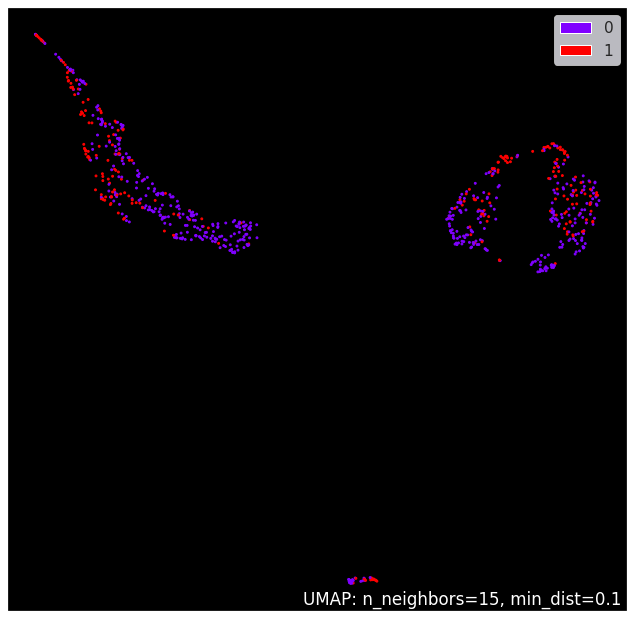

In [ ]:
X_train_umap = data.drop('Outcome',axis=1)
y_train_umap = data['Outcome']

mapper = umap.UMAP().fit(X_train_umap)
umap.plot.points(mapper, labels=y_train_umap, theme='fire')

3D plot for umap

In [ ]:
from umap import UMAP

umap_3d = UMAP(n_components=3, init='random', random_state=0)
x_umap = umap_3d.fit_transform(X_train_umap)
umap_df = pd.DataFrame(x_umap)
train_y_sr = pd.Series(y_train_umap,name='label').astype(str)
print(type(x_umap))
new_df = pd.concat([umap_df,train_y_sr],axis=1)
fig = px.scatter_3d(
    new_df, x=0, y=1, z=2,
    color='label', labels={'color': 'number'}
)
fig.update_traces(marker_size=1.5)
fig.show()

<class 'numpy.ndarray'>


##t-SNE

In [ ]:
from sklearn.manifold import TSNE

Fitting t-SNE to features

In [ ]:
tsne = TSNE(random_state=42).fit_transform(X_scaled)

In [ ]:
labels

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


t-SNE visualization

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
tsne_results = tsne.fit_transform(X_scaled)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 768 samples in 0.002s...
[t-SNE] Computed neighbors for 768 samples in 0.208s...
[t-SNE] Computed conditional probabilities for sample 768 / 768
[t-SNE] Mean sigma: 1.236829
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.733788
[t-SNE] KL divergence after 2000 iterations: 0.570980


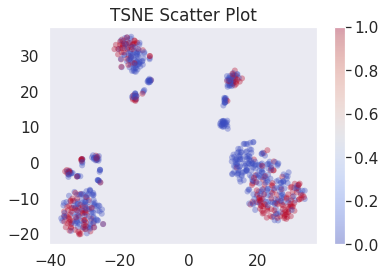

In [ ]:
target = data['Outcome']
plt.scatter(tsne_results[:,0],tsne_results[:,1], c = target,
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show()


##Univariate Analysis

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



F-Test Feature Scores List: 
 [3.84214686e-02 1.00000000e+00 1.86025343e-02 8.03669568e-05
 6.24721780e-05 3.80770150e-01 1.44877860e-01 2.95252799e-01]
Feature List: 
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1 

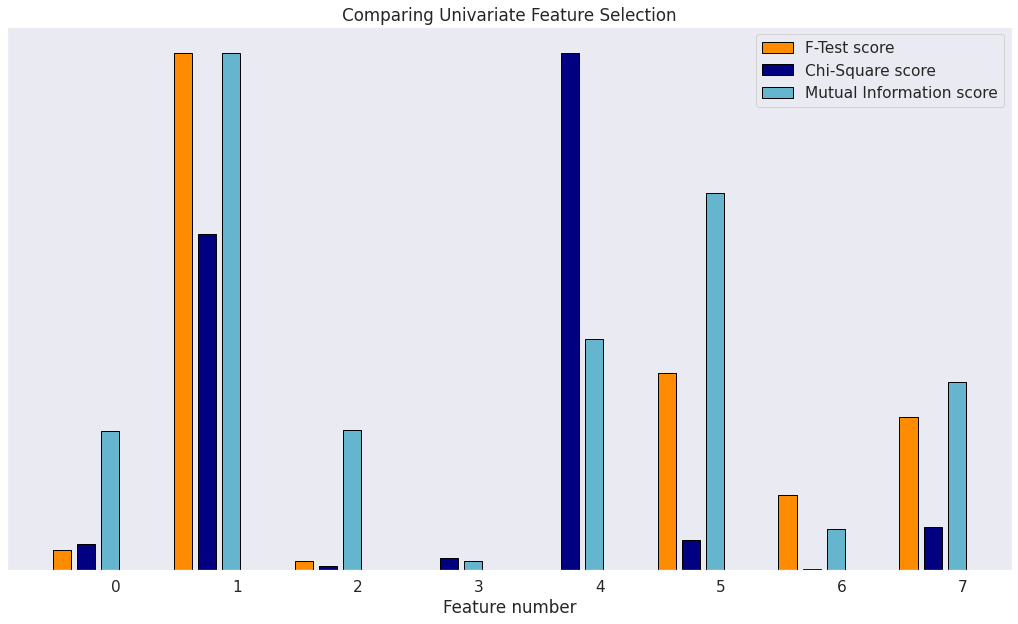

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif


plt.figure(figsize=(18,10)); plt.clf()
x_indices = np.arange(X_scaled.shape[-1])

x_new_f = SelectKBest(f_classif, k=6)
x_new_f.fit_transform(X_scaled, labels)

scores = x_new_f.scores_
scores /= scores.max()
plt.bar(x_indices - .45, scores, width=.15,
        label='F-Test score', color='darkorange',
        edgecolor='black')

print('F-Test Feature Scores List: \n', x_new_f.scores_)
print('Feature List: \n', features, '\n')

x_new_chi2 = SelectKBest(chi2, k=6)
x_new_chi2.fit_transform(features, labels)

scores = x_new_chi2.scores_
scores /= scores.max()
plt.bar(x_indices - .25, scores, width=.15,
        label='Chi-Square score', color='navy',
        edgecolor='black')


print('Chi-Square Test Feature Scores List: \n', x_new_chi2.scores_)
print('Feature List: \n', features.columns, '\n')

x_new_mi = SelectKBest(mutual_info_classif, k=6)
x_new_mi.fit_transform(features, labels)
scores = x_new_mi.scores_
scores /= scores.max()
plt.bar(x_indices - .05, scores, width=.15,
        label='Mutual Information score', color='c',
        edgecolor='black')


print('Mutual Information Feature Scores List: \n', x_new_mi.scores_)
print('Feature List: \n', features.columns, '\n')


plt.title("Comparing Univariate Feature Selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()


x_new_f = SelectKBest(f_classif, k=6).fit_transform(features, labels)
x_new_chi2 = SelectKBest(chi2, k=6).fit_transform(features, labels)
x_new_mi = SelectKBest(mutual_info_classif, k=6).fit_transform(features, labels)

F-Test

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.



Best parameters found:
 {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (96, 48), 'learning_rate': 'constant', 'solver': 'adam'} 

Confusion Matrix:
 [[98 25]
 [36 33]] 

Results on the test set:
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       123
           1       0.57      0.48      0.52        69

    accuracy                           0.68       192
   macro avg       0.65      0.64      0.64       192
weighted avg       0.67      0.68      0.68       192



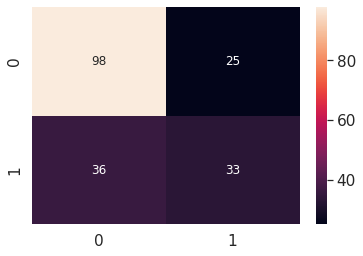

In [ ]:
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(x_new_f, labels, test_size=0.25, random_state=42)

mlp = MLPClassifier(max_iter=100)


parameter_space = {
    'hidden_layer_sizes': [(8,4), (24,12), (48,24), (96,48)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
}


from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)


print('Best parameters found:\n', clf.best_params_,'\n')


y_true, y_pred = y_test , clf.predict(X_test)

from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix:\n', cm, '\n')
sns.heatmap(cm,annot=True,fmt="d", annot_kws={"size": 12})

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Chi-Square

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.



Best parameters found:
 {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (24, 12), 'learning_rate': 'constant', 'solver': 'sgd'} 

Confusion Matrix:
 [[113  10]
 [ 51  18]] 

Results on the test set:
              precision    recall  f1-score   support

           0       0.69      0.92      0.79       123
           1       0.64      0.26      0.37        69

    accuracy                           0.68       192
   macro avg       0.67      0.59      0.58       192
weighted avg       0.67      0.68      0.64       192



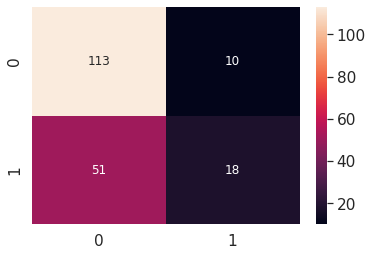

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_new_chi2, labels, test_size=0.25, random_state=42)


mlp = MLPClassifier(max_iter=100)


parameter_space = {
    'hidden_layer_sizes': [(8,4), (24,12), (48,24), (96,48)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
}


from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)


print('Best parameters found:\n', clf.best_params_,'\n')


y_true, y_pred = y_test , clf.predict(X_test)


from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix:\n', cm, '\n')
sns.heatmap(cm,annot=True,fmt="d", annot_kws={"size": 12}) # font size

# Classification Report
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

##Conclusion
>* UMAP and t-SNE were not as useful since this data was rather low dimensional, however it helped visualize the data
>* Chi-square slightly outperforms F-test
>* PCA is very useful in lowering the dimensionality of the data while providing relativley similar results in terms of accuracy
>*

In [ ]:
import faiss                   # make faiss available
index = faiss.IndexFlatL2(d)   # build the index

index.add(xb)                  # add vectors to the index
print(index.ntotal)

